In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [210]:
data = pd.read_csv('AAPL.csv')
X=data.reset_index()['close']
y=data['date']
Y=[]
for i in range(len(y)):
    Y.append(y[i][0:10])

Y=np.ravel(Y)

Y.reshape(-1,1)    


print(Y.shape)




(1258,)


In [211]:
y

0       2015-05-27 00:00:00+00:00
1       2015-05-28 00:00:00+00:00
2       2015-05-29 00:00:00+00:00
3       2015-06-01 00:00:00+00:00
4       2015-06-02 00:00:00+00:00
                  ...            
1253    2020-05-18 00:00:00+00:00
1254    2020-05-19 00:00:00+00:00
1255    2020-05-20 00:00:00+00:00
1256    2020-05-21 00:00:00+00:00
1257    2020-05-22 00:00:00+00:00
Name: date, Length: 1258, dtype: object

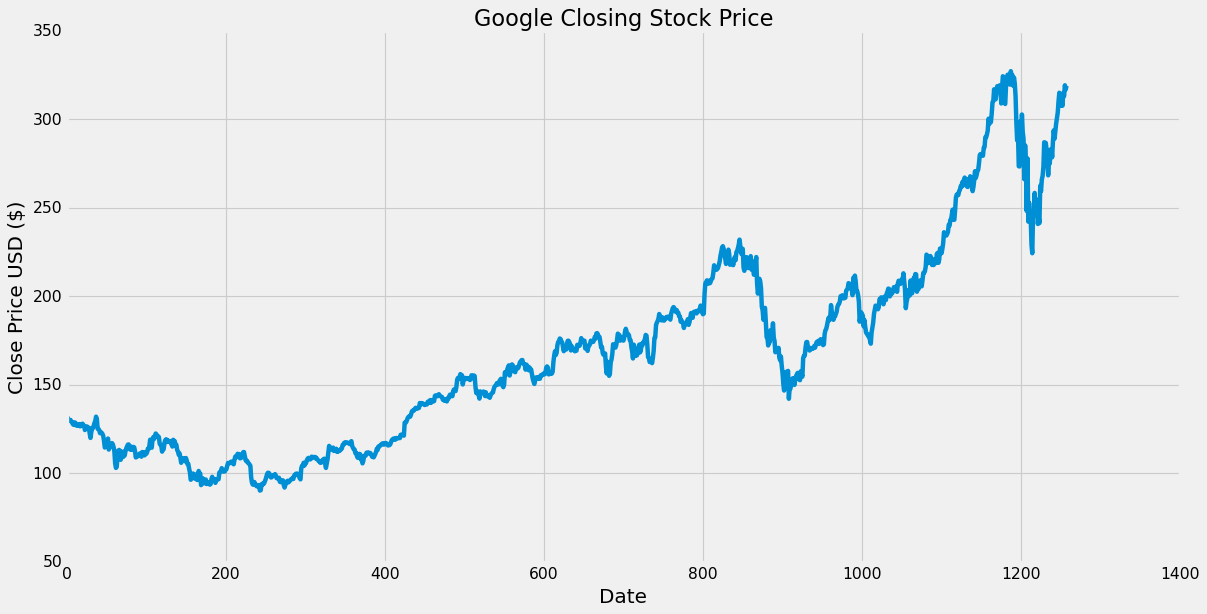

In [212]:

plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
plt.title("Google Closing Stock Price")
plt.plot(data["close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

In [213]:

x=data['close']
j={'ds':Y,'y':x}
k=pd.DataFrame(data=j)

k

,ds,y
0,2015-05-27,132.045
1,2015-05-28,131.780
2,2015-05-29,130.280
3,2015-06-01,130.535
4,2015-06-02,129.960
...,...,...
1253,2020-05-18,314.960
1254,2020-05-19,313.140
1255,2020-05-20,319.230
1256,2020-05-21,316.850


In [215]:
import prophet
m=prophet.Prophet(daily_seasonality=True)
m.fit(k)

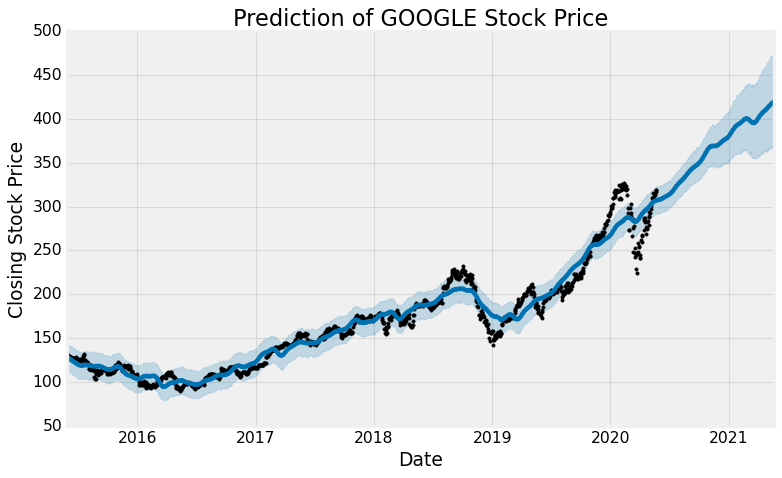

In [216]:
future = m.make_future_dataframe(periods=365)
predictions=m.predict(future)
m.plot(predictions)
plt.title("Prediction of GOOGLE Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

In [218]:
predictions

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-05-27,130.911390,115.137597,145.045002,130.911390,130.911390,-0.891325,-0.891325,-0.891325,1.550348,...,0.319907,0.319907,0.319907,-2.761580,-2.761580,-2.761580,0.0,0.0,0.0,130.020065
1,2015-05-28,130.769040,113.983258,145.835820,130.769040,130.769040,-1.217577,-1.217577,-1.217577,1.550348,...,0.218359,0.218359,0.218359,-2.986285,-2.986285,-2.986285,0.0,0.0,0.0,129.551462
2,2015-05-29,130.626689,113.121472,144.224245,130.626689,130.626689,-1.742000,-1.742000,-1.742000,1.550348,...,-0.081796,-0.081796,-0.081796,-3.210552,-3.210552,-3.210552,0.0,0.0,0.0,128.884689
3,2015-06-01,130.199638,112.266418,142.887685,130.199638,130.199638,-2.545111,-2.545111,-2.545111,1.550348,...,-0.238836,-0.238836,-0.238836,-3.856623,-3.856623,-3.856623,0.0,0.0,0.0,127.654527
4,2015-06-02,130.057287,112.546669,142.233372,130.057287,130.057287,-2.336230,-2.336230,-2.336230,1.550348,...,0.169953,0.169953,0.169953,-4.056532,-4.056532,-4.056532,0.0,0.0,0.0,127.721057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1618,2021-05-18,418.482686,368.996572,472.844953,370.647414,470.537465,0.488964,0.488964,0.488964,1.550348,...,0.169953,0.169953,0.169953,-1.231337,-1.231337,-1.231337,0.0,0.0,0.0,418.971650
1619,2021-05-19,418.790464,367.975474,476.515227,370.658550,471.197898,0.522385,0.522385,0.522385,1.550348,...,0.319907,0.319907,0.319907,-1.347870,-1.347870,-1.347870,0.0,0.0,0.0,419.312849
1620,2021-05-20,419.098242,364.444357,473.108098,370.687807,471.858331,0.282410,0.282410,0.282410,1.550348,...,0.218359,0.218359,0.218359,-1.486297,-1.486297,-1.486297,0.0,0.0,0.0,419.380653
1621,2021-05-21,419.406021,364.872980,473.795238,370.802887,472.517572,-0.176176,-0.176176,-0.176176,1.550348,...,-0.081796,-0.081796,-0.081796,-1.644728,-1.644728,-1.644728,0.0,0.0,0.0,419.229845


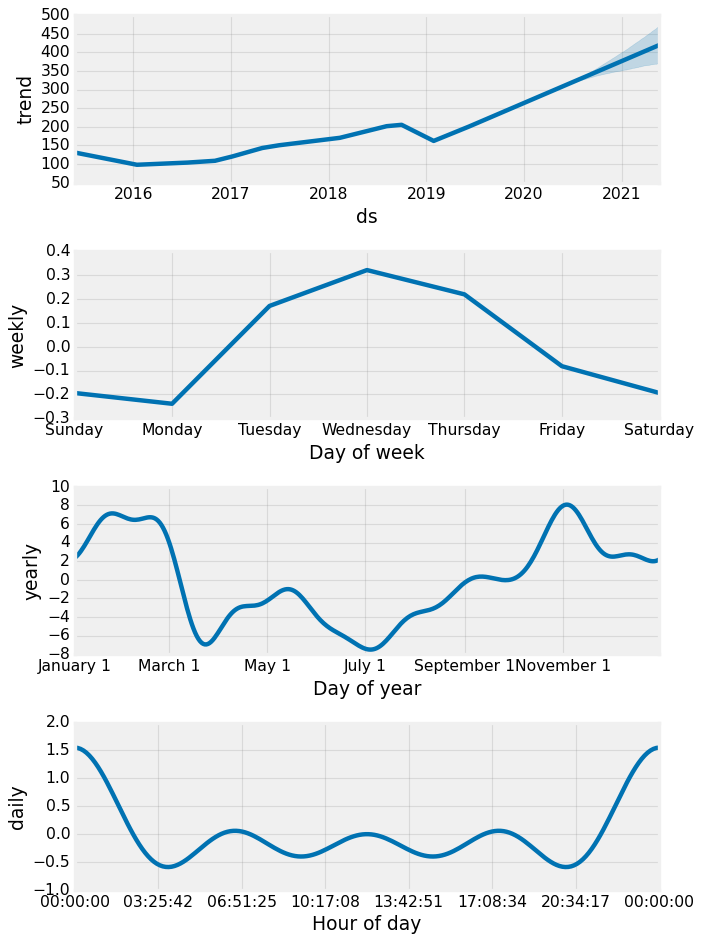

In [217]:
m.plot_components(predictions)
plt.show()